# SMS SPAM CLASSIFIER

## Dataset Information

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5572 messages tagged according being ham(leggitimate) or spam.

## Attributes

- SMS Messages

- Label(spam/ham)

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string 

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('spam.csv')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning

In [5]:
# Check for NaNs 
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

<AxesSubplot:>

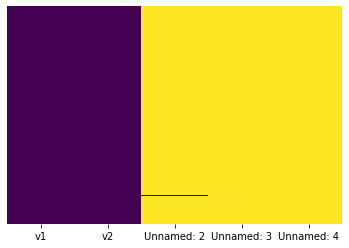

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [7]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)

In [8]:
df.sample(5)

,v1,v2
2082,ham,I'm done oredi...
1593,spam,PRIVATE! Your 2003 Account Statement for shows...
4209,ham,No da:)he is stupid da..always sending like th...
3353,ham,R u sure they'll understand that! Wine * good ...
3823,ham,I miss you so much I'm so desparate I have rec...


In [9]:
# renaming the cols
df.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)

In [10]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Target']=le.fit_transform(df['Target'])

In [12]:
df.sample(5)

,Target,Text
2055,0,"Sir, I am waiting for your mail."
5356,0,Tell me something. Thats okay.
4799,0,its cool but tyler had to take off so we're go...
5201,1,YOU VE WON! Your 4* Costa Del Sol Holiday or �...
2225,0,Alrite jod hows the revision goin? Keris bin d...


In [13]:
#check for duplicates
df.duplicated().sum()

403

In [14]:
# Drop duplicates
df=df.drop_duplicates(keep='first')

In [15]:
df.shape

(5169, 2)

# EDA

In [16]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

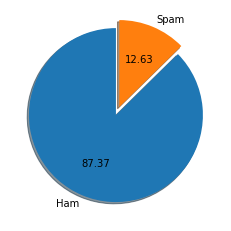

In [17]:
plt.pie(df['Target'].value_counts(), labels=['Ham','Spam'],autopct='%0.2f',startangle=90,shadow=True,explode=(0,0.1))
plt.show()

data is imbalanced

In [18]:
#checking for number of characters in each text
df['num_character']=df['Text'].apply(len)

In [19]:
df.head()

,Target,Text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
#checking for number of words in each text
df['num_word']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [21]:
df.head()

,Target,Text,num_character,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
#checking for number of sentences in each text 
df['no_sentences']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,Target,Text,num_character,num_word,no_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_character','num_word','no_sentences']].describe()

,num_character,num_word,no_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#ham
df[df['Target']==0][['num_character','num_word','no_sentences']].describe() 

,num_character,num_word,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#spam
df[df['Target']==1][['num_character','num_word','no_sentences']].describe() 

,num_character,num_word,no_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


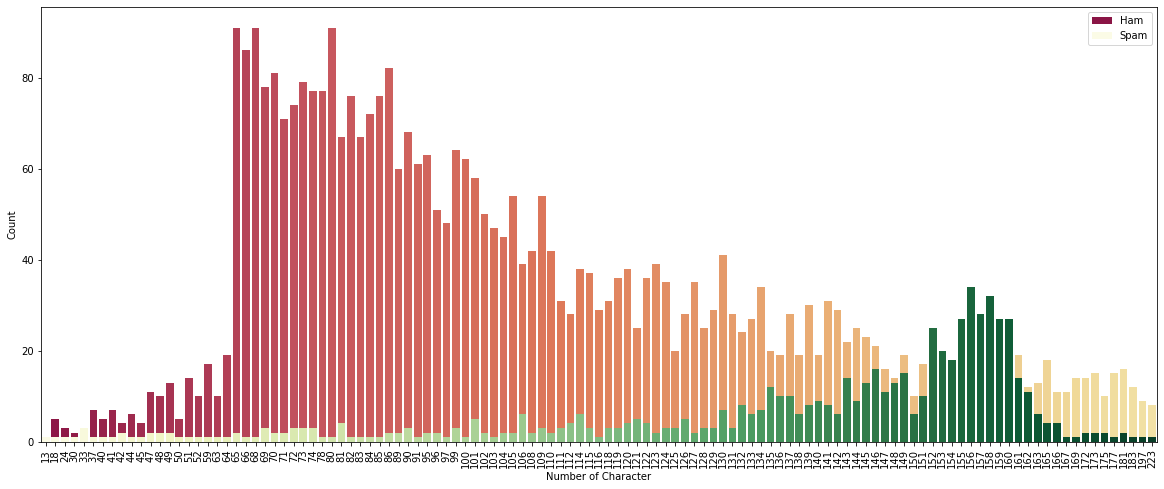

In [27]:
plt.figure(figsize=(20,8))
sns.countplot(df[df['Target']==0]['num_character'],palette='Spectral') #ham
sns.countplot(df[df['Target']==1]['num_character'],palette='YlGn') #spam
plt.xlabel("Number of Character")
plt.ylabel("Count")
plt.legend(labels=['Ham','Spam'])
plt.xticks(rotation=90)
plt.show()

Number of characters are more in Ham Messages as compared to Spam Messages 

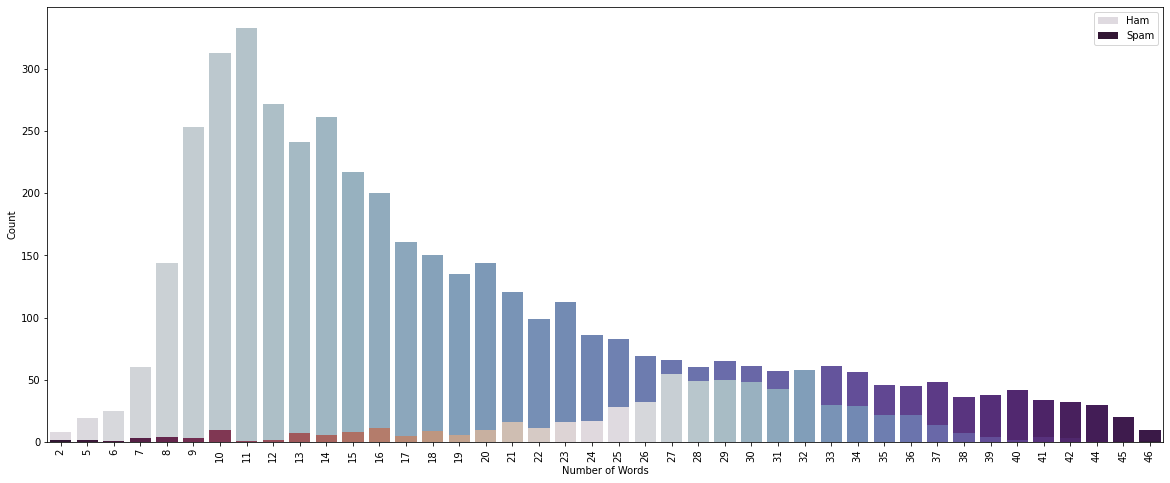

In [28]:
plt.figure(figsize=(20,8))
sns.countplot(df[df['Target']==0]['num_word'],palette='twilight') #ham
sns.countplot(df[df['Target']==1]['num_word'],palette='twilight_shifted_r') #spam
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.legend(labels=['Ham','Spam'])
plt.xticks(rotation=90)
plt.show()

Number of words are more in Ham Messages as compared to Spam Messages 

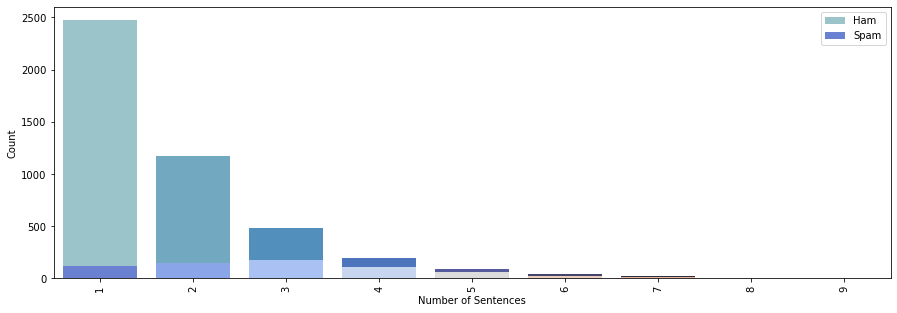

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(df[df['Target']==0]['no_sentences'], palette='icefire') #ham
sns.countplot(df[df['Target']==1]['no_sentences'],palette='coolwarm') #spam
plt.xlabel("Number of Sentences")
plt.ylabel("Count")
plt.legend(labels=['Ham','Spam'])
plt.xticks(rotation=90)
plt.show()

Number of Sentences used are more in Ham Messages as compared to Spam Messages 

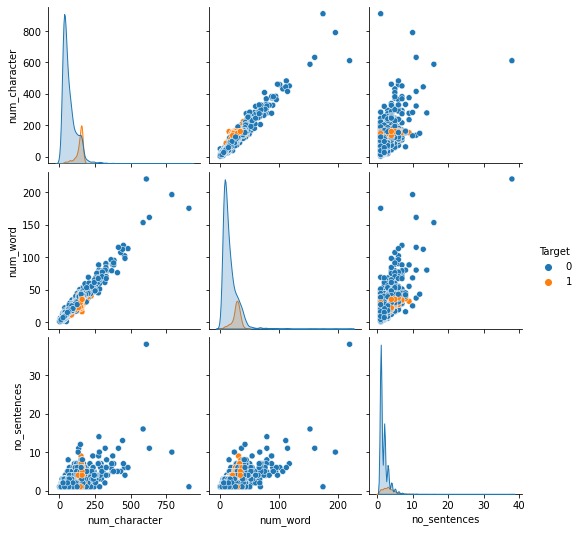

In [30]:
sns.pairplot(data=df, hue='Target')

In [31]:
df.corr().style.background_gradient()

,Target,num_character,num_word,no_sentences
Target,1.000000,0.382785,0.263143,0.269132
num_character,0.382785,1.000000,0.966087,0.626197
num_word,0.263143,0.966087,1.000000,0.680924
no_sentences,0.269132,0.626197,0.680924,1.000000


<AxesSubplot:>

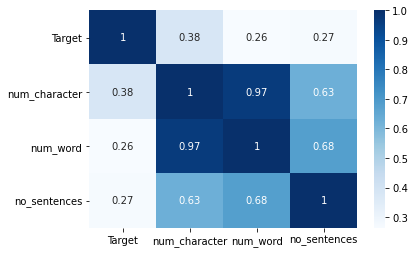

In [32]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

# Data Preprocessing 

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [34]:
def transform_text(text):
    text = text.lower()  #Converting text into lower case
    text = nltk.word_tokenize(text)  #Splitting strings into tokens
    
    y = []
    for i in text:
        if i.isalnum():  #Removing special characters
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:  #Removing stop words and punctuation
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))  #Stemming
    
            
    return " ".join(y)

In [35]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [36]:
df['Transformed_text']= df['Text'].apply(transform_text)

In [37]:
df.head()

,Target,Text,num_character,num_word,no_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [38]:
#Converting the text numerical feature vectors.
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [39]:
x = tfidf.fit_transform(df['Text']).toarray()

In [40]:
y=df.iloc[:,0].values

In [41]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [44]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
logreg=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
dt=DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [45]:
models = []
models.append(("KNN     -:", KNeighborsClassifier()))
models.append(("Logreg  -:", LogisticRegression()))
models.append(("SVM     -:", SVC()))
models.append(("DT      -:", DecisionTreeClassifier()))
models.append(("GBN     -:", GaussianNB()))
models.append(("MNB    -:", MultinomialNB()))
models.append(("BNB     -:", BernoulliNB()))
models.append(("RF    -:", RandomForestClassifier()))
models.append(("ADA     -:", AdaBoostClassifier()))
models.append(("BC     -:",BaggingClassifier()))
models.append(("GBC     -:", GradientBoostingClassifier()))
models.append(("XGB     -:", XGBClassifier()))

accuracy=[]
precision=[]
for name, model in models:
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    ac = accuracy_score(ytest, ypred)
    accuracy.append(round(ac*100))
    pc=precision_score(ytest,ypred)
    precision.append(round(pc*100))
    
    print(name)
    print(f'Accuracy: {accuracy_score(ytest,ypred)}')
    print(f'Precision: {precision_score(ytest,ypred)}')
    print(f'Confusion Matrix:\n {confusion_matrix(ytest,ypred)}')
    print(f'Classification Report:\n {classification_report(ytest, ypred)}')
    print()
    
print(f"Avg. Ensemble Acurracy-: {np.array(accuracy).mean()} %")

KNN     -:
Accuracy: 0.90715667311412
Precision: 1.0
Confusion Matrix:
 [[896   0]
 [ 96  42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       896
           1       1.00      0.30      0.47       138

    accuracy                           0.91      1034
   macro avg       0.95      0.65      0.71      1034
weighted avg       0.92      0.91      0.88      1034


Logreg  -:
Accuracy: 0.9642166344294004
Precision: 0.9902912621359223
Confusion Matrix:
 [[895   1]
 [ 36 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       0.99      0.74      0.85       138

    accuracy                           0.96      1034
   macro avg       0.98      0.87      0.91      1034
weighted avg       0.97      0.96      0.96      1034


SVM     -:
Accuracy: 0.9796905222437138
Precision: 0.9915966386554622
Confusion Matrix:
 

In [46]:
clfs = {
    'KNN' : knn,
    'LOGREG': logreg,
    'SVC' : svm,
    'DT': dt, 
    'GNB': gnb,
    'MNB': mnb,
    'BNB': bnb,
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'GBC':gbc,
    'XGB':xgb
}

In [47]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy,'Precision':precision})

In [48]:
performance_df

,Algorithm,Accuracy,Precision
0,KNN,91,100
1,LOGREG,96,99
2,SVC,98,99
3,DT,96,85
4,GNB,90,57
5,MNB,97,100
6,BNB,99,98
7,RF,98,100
8,AdaBoost,97,94
9,BgC,96,88


<AxesSubplot:xlabel='Algorithm', ylabel='Accuracy'>

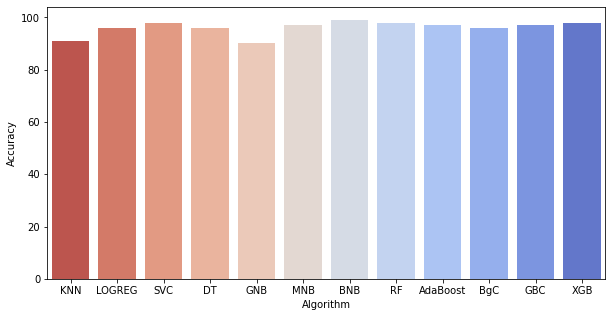

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(x= 'Algorithm', y='Accuracy',palette='coolwarm_r',data=performance_df)

# Hyperparametric Tuning

### KNN

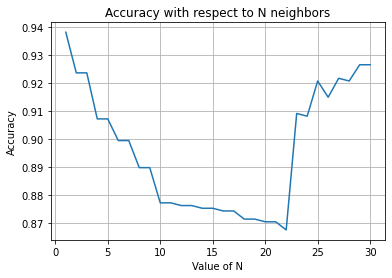

In [50]:
accuracy=[]
for i in range (1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)
    
plt.plot(range(1,31), accuracy)
plt.title("Accuracy with respect to N neighbors")
plt.xlabel('Value of N')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [51]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print(f'Accuracy: {accuracy_score(ytest,ypred)}')
print(f'Precision: {precision_score(ytest,ypred)}')

Accuracy: 0.9381044487427466
Precision: 1.0


In [52]:
#cross validation on knn for accuracy
cvs=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print(cvs.mean())

0.9442835181748901


In [53]:
#cross validation on knn for precision
cvs=cross_val_score(knn,x,y,cv=5,scoring='precision')
print(cvs.mean())

0.9973333333333333


### SVM

In [54]:
svm = SVC(kernel='linear', gamma=1.0)
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)
print(f'Accuracy: {accuracy_score(ytest,ypred)}')
print(f'Precision: {precision_score(ytest,ypred)}')

Accuracy: 0.9806576402321083
Precision: 0.9836065573770492


In [55]:
svm = SVC(kernel='poly', gamma=1.0)
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)
print(f'Accuracy: {accuracy_score(ytest,ypred)}')
print(f'Precision: {precision_score(ytest,ypred)}')

Accuracy: 0.9274661508704062
Precision: 1.0


In [56]:
svm = SVC(kernel='sigmoid', gamma=1.0)
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)
print(f'Accuracy: {accuracy_score(ytest,ypred)}')
print(f'Precision: {precision_score(ytest,ypred)}')

Accuracy: 0.9806576402321083
Precision: 0.9836065573770492


### Logistic Regression

In [57]:
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)
print(f'Accuracy: {accuracy_score(ytest,ypred)}')
print(f'Precision: {precision_score(ytest,ypred)}')

Accuracy: 0.9613152804642167
Precision: 0.9454545454545454


In [58]:
#cross validation on logreg for accuracy
cvs=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print(cvs.mean())

0.9603391747384663


In [59]:
#cross validation on logreg for precision
cvs=cross_val_score(logreg,x,y,cv=5,scoring='precision')
print(cvs.mean())

0.9379741686884543


### Decision Tree

In [60]:
for i in range(1,50):
    dt1 = DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain, ytrain)
    ypred = dt1.predict(xtest)
    print(f'{i} -: {accuracy_score(ytest, ypred)}') 

1 -: 0.8955512572533849
2 -: 0.9245647969052224
3 -: 0.9342359767891683
4 -: 0.9381044487427466
5 -: 0.9458413926499033
6 -: 0.9410058027079303
7 -: 0.9429400386847195
8 -: 0.9516441005802708
9 -: 0.9497098646034816
10 -: 0.9516441005802708
11 -: 0.9526112185686654
12 -: 0.9555125725338491
13 -: 0.9555125725338491
14 -: 0.9574468085106383
15 -: 0.9584139264990329
16 -: 0.9564796905222437
17 -: 0.9574468085106383
18 -: 0.9584139264990329
19 -: 0.9574468085106383
20 -: 0.9584139264990329
21 -: 0.9574468085106383
22 -: 0.9564796905222437
23 -: 0.9555125725338491
24 -: 0.9535783365570599
25 -: 0.9545454545454546
26 -: 0.9526112185686654
27 -: 0.9564796905222437
28 -: 0.9574468085106383
29 -: 0.9564796905222437
30 -: 0.9535783365570599
31 -: 0.9574468085106383
32 -: 0.9564796905222437
33 -: 0.960348162475822
34 -: 0.9535783365570599
35 -: 0.9564796905222437
36 -: 0.9545454545454546
37 -: 0.9526112185686654
38 -: 0.9526112185686654
39 -: 0.9584139264990329
40 -: 0.9564796905222437
41 -: 0.95

In [61]:
#max_depth
dt2 = DecisionTreeClassifier(max_depth=97)
dt2.fit(xtrain,ytrain)
ypred=dt2.predict(xtest)
print(f'Accuracy: {accuracy_score(ytest,ypred)}')
print(f'Precision: {precision_score(ytest,ypred)}')

Accuracy: 0.9506769825918762
Precision: 0.8320610687022901


In [62]:
for i in range(1,50,5):
    dt3 = DecisionTreeClassifier(min_samples_leaf=i)
    dt3.fit(xtrain, ytrain)
    ypred = dt3.predict(xtest)
    print(f'{i} -: {accuracy_score(ytest, ypred)}')   

1 -: 0.9497098646034816
6 -: 0.9564796905222437
11 -: 0.9439071566731141
16 -: 0.9448742746615088
21 -: 0.9400386847195358
26 -: 0.9361702127659575
31 -: 0.9352030947775629
36 -: 0.9342359767891683
41 -: 0.9323017408123792
46 -: 0.9323017408123792


In [63]:
#min_sample_leaf
dt4 = DecisionTreeClassifier(min_samples_leaf=1)
dt4.fit(xtrain,ytrain)
ypred=dt4.predict(xtest)
print(f'Accuracy: {accuracy_score(ytest,ypred)}')
print(f'Precision: {precision_score(ytest,ypred)}')

Accuracy: 0.9555125725338491
Precision: 0.8382352941176471


In [64]:
#gini
dt5 = DecisionTreeClassifier(criterion='gini', max_depth=97)
dt5.fit(xtrain,ytrain)
ypred=dt5.predict(xtest)
print(f'Accuracy: {accuracy_score(ytest,ypred)}')
print(f'Precision: {precision_score(ytest,ypred)}')

Accuracy: 0.9555125725338491
Precision: 0.8432835820895522


In [65]:
#entropy
dt6 = DecisionTreeClassifier(criterion='entropy', max_depth=97)
dt6.fit(xtrain,ytrain)
ypred=dt6.predict(xtest)
print(f'Accuracy: {accuracy_score(ytest,ypred)}')
print(f'Precision: {precision_score(ytest,ypred)}')

Accuracy: 0.9535783365570599
Precision: 0.8629032258064516


In [66]:
#cross validation for DT accuracy
cvs=cross_val_score(dt6,x,y,cv=5,scoring='accuracy') #entropy
print(cvs.mean())

0.9620809233402177


In [67]:
#cross validation for DT precision
cvs=cross_val_score(dt6,x,y,cv=5,scoring='precision') #entropy
print(cvs.mean())

0.8708489880890165


In [68]:
knn = KNeighborsClassifier(n_neighbors=1)
logreg = LogisticRegression(solver='liblinear', penalty='l1')
svm = SVC(kernel='sigmoid', gamma=1.0)
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=97)
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
models = []
models.append(("KNN     -:", KNeighborsClassifier(n_neighbors=1)))
models.append(("Logreg  -:", LogisticRegression(solver='liblinear', penalty='l1')))
models.append(("SVM     -:", SVC(kernel='sigmoid', gamma=1.0)))
models.append(("DT      -:", DecisionTreeClassifier(criterion='entropy', max_depth=97)))
models.append(("RF    -:", RandomForestClassifier()))
models.append(("GBN     -:", GaussianNB()))
models.append(("MNB    -:", MultinomialNB()))
models.append(("BNB     -:", BernoulliNB()))
models.append(("ADA     -:", AdaBoostClassifier(n_estimators=50, random_state=2)))
models.append(("BC     -:",BaggingClassifier(n_estimators=50, random_state=2)))
models.append(("GBC     -:", GradientBoostingClassifier(n_estimators=50,random_state=2)))
models.append(("XGB     -:", XGBClassifier(n_estimators=50,random_state=2)))

accuracy=[]
precision=[]
for name, model in models:
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    ac = accuracy_score(ytest, ypred)
    accuracy.append(round(ac*100))
    pc=precision_score(ytest,ypred)
    precision.append(round(pc*100))
    
    print(name)
    print(f'Accuracy: {accuracy_score(ytest,ypred)}')
    print(f'Precision: {precision_score(ytest,ypred)}')
    print(f'Confusion Matrix:\n {confusion_matrix(ytest,ypred)}')
    print(f'Classification Report:\n {classification_report(ytest, ypred)}')
    print()
    
print(f"Avg. Ensemble Acurracy-: {np.array(accuracy).mean()} %")

KNN     -:
Accuracy: 0.9381044487427466
Precision: 1.0
Confusion Matrix:
 [[896   0]
 [ 64  74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       896
           1       1.00      0.54      0.70       138

    accuracy                           0.94      1034
   macro avg       0.97      0.77      0.83      1034
weighted avg       0.94      0.94      0.93      1034


Logreg  -:
Accuracy: 0.9613152804642167
Precision: 0.9454545454545454
Confusion Matrix:
 [[890   6]
 [ 34 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       896
           1       0.95      0.75      0.84       138

    accuracy                           0.96      1034
   macro avg       0.95      0.87      0.91      1034
weighted avg       0.96      0.96      0.96      1034


SVM     -:
Accuracy: 0.9806576402321083
Precision: 0.9836065573770492
Confusion Matrix:

In [70]:
performance = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy,'Precision':precision})

In [71]:
performance

,Algorithm,Accuracy,Precision
0,KNN,94,100
1,LOGREG,96,95
2,SVC,98,98
3,DT,95,86
4,GNB,98,99
5,MNB,90,57
6,BNB,97,100
7,RF,99,98
8,AdaBoost,97,94
9,BgC,96,90


<AxesSubplot:xlabel='Algorithm', ylabel='Accuracy'>

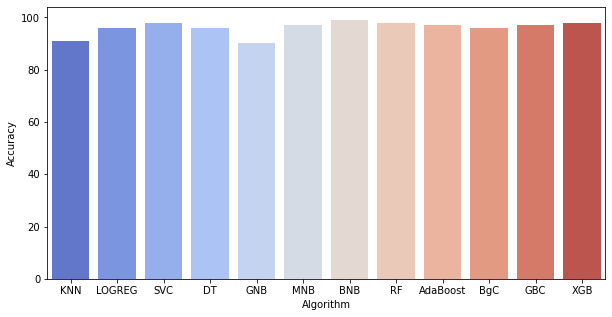

In [72]:
plt.figure(figsize=(10,5))
sns.barplot(x= 'Algorithm', y='Accuracy',palette='coolwarm',data=performance_df)

### Voting Classifier

In [73]:
models=[('knn',KNeighborsClassifier(n_neighbors=1)),('mnb',MultinomialNB()),('rf',RandomForestClassifier())]

In [74]:
#Hard voting
voting = VotingClassifier(estimators=models)
voting.fit(xtrain,ytrain)
ypred = voting.predict(xtest)
print("Accuracy",accuracy_score(ytest,ypred))
print("Precision",precision_score(ytest,ypred))

Accuracy 0.9729206963249516
Precision 1.0


In [75]:
#Soft voting 
voting = VotingClassifier(estimators=models,voting='soft')
voting.fit(xtrain,ytrain)
ypred = voting.predict(xtest)
print("Accuracy",accuracy_score(ytest,ypred))
print("Precision",precision_score(ytest,ypred))

Accuracy 0.9574468085106383
Precision 1.0


### Stacking

In [76]:
estimators=[('KNN', knn), ('MNB', mnb), ('RF', rfc)]
final_estimator=RandomForestClassifier()

In [77]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)
print("Accuracy",accuracy_score(ytest,ypred))
print("Precision",precision_score(ytest,ypred))

Accuracy 0.9806576402321083
Precision 0.9154929577464789


In [78]:
#MNB
mnb.fit(xtrain,ytrain)
ypred1 = mnb.predict(xtest)
print(accuracy_score(ytest,ypred1))
print(precision_score(ytest,ypred1))

0.9729206963249516
1.0


## Conclusion 

1. From the EDA performed on the dataset it can be conclude that number of characters, words and sentences used in Ham messages are more as compared with spam messages.

2. From the heat map performed to check the correlation, we see that our Target column has the higest correlation with the number of characters used in the text. 

3. After applying the set of algorithm along with the tuning of models, the best accuracy was found with Multinominal Naive Bayes. 

- Best Accuracy: 97.29
- Best Precision: 1.0

## Saving model

In [80]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [81]:
print('Accuracy of model(multinomial naive bayes) :' , accuracy_score(ytest , ypred1))
print('Precision of model(multinomial naive bayes) :' , precision_score(ytest , ypred1))

Accuracy of model(multinomial naive bayes) : 0.9729206963249516
Precision of model(multinomial naive bayes) : 1.0
